In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/train.csv')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score



In [8]:
import scipy.stats as stats

# function transformer are used to modified the data into normally distributed data

1.log transform used for right skew data

2.sq/sqrt transform sq=used for left skew data

3.reciprocol transform

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-10-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

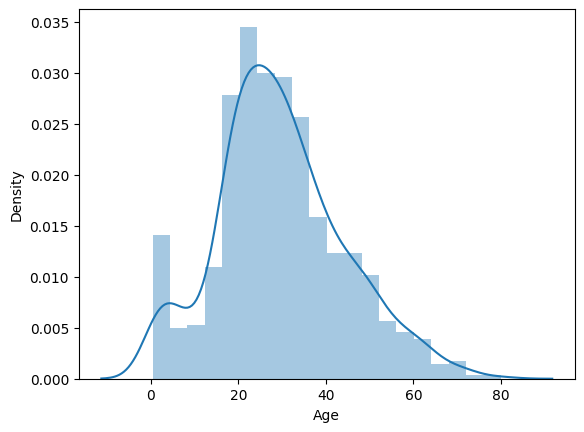

In [10]:
sns.distplot(df['Age'])

In [12]:
# Drop the specified columns
df = df.drop(columns=['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [14]:
df.sample(5)

,Survived,Age,Fare
114,0,17.0,14.4583
742,1,21.0,262.3750
80,0,22.0,9.0000
411,0,NaN,6.8583
135,0,23.0,15.0458


In [15]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [16]:
# we have to fill the null values
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-16-e4d172375375>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [18]:
df['Age'].isnull().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='Density'>

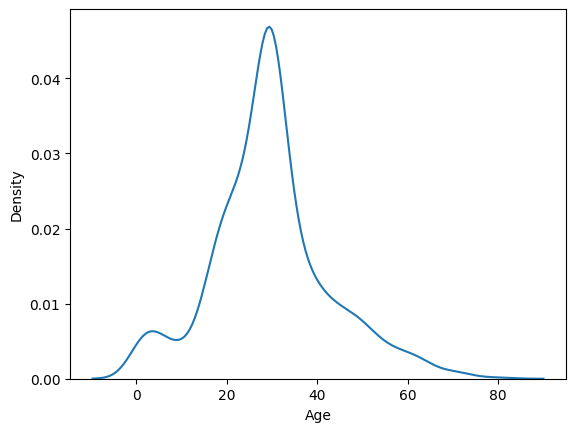

In [20]:
sns.kdeplot(df['Age'])


<Axes: xlabel='Fare', ylabel='Density'>

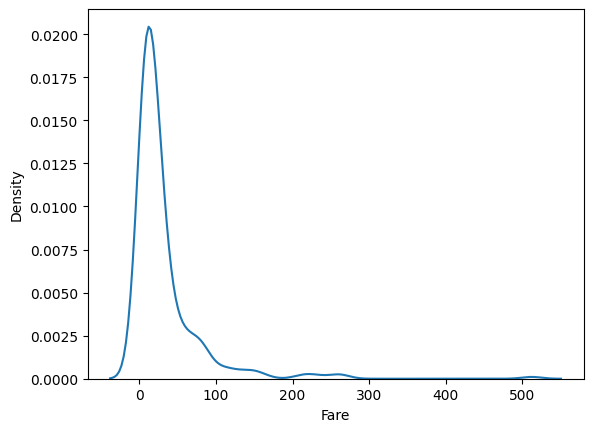

In [21]:
sns.kdeplot(df['Fare'])

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

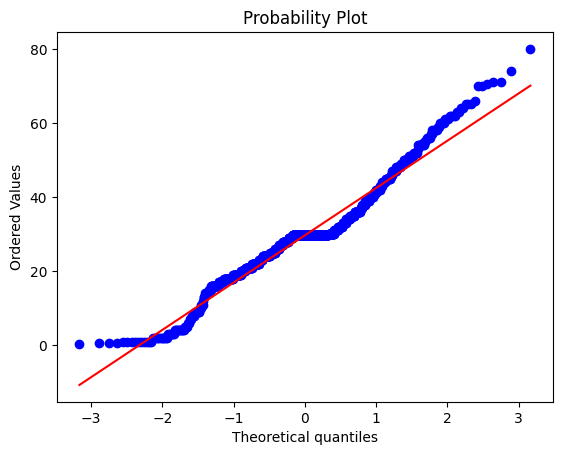

In [22]:
# age is looking normally but fare is right skew data so we have to use log
# transform

stats.probplot(df['Age'],plot=plt)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

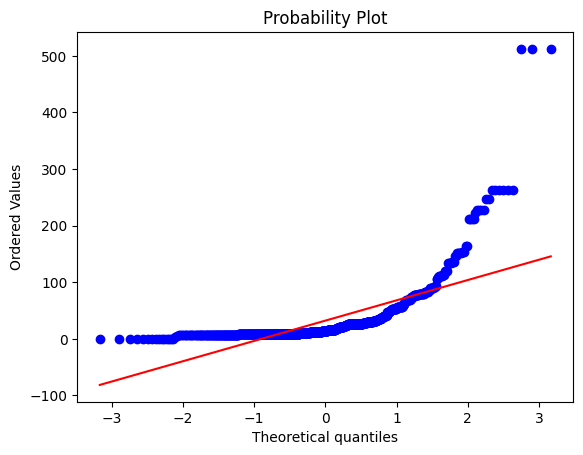

In [23]:
stats.probplot(df['Fare'],plot=plt,dist='norm')

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [28]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


# without transforming the columns

In [31]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print("accurancy score of LR",accuracy_score(y_test,y_pred))
print("accurancy score of DR",accuracy_score(y_test,y_pred1))


accurancy score of LR 0.6480446927374302
accurancy score of DR 0.6703910614525139


# with transforming data

In [32]:
trf=FunctionTransformer(np.log1p)
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred=clf.predict(x_test_trf)
y_pred1=clf2.predict(x_test_trf)

print("accurancy score of LR",accuracy_score(y_test,y_pred))
print("accurancy score of DR",accuracy_score(y_test,y_pred1))

accurancy score of LR 0.6815642458100558
accurancy score of DR 0.6815642458100558


In [34]:
# improve in lr so cross check by cross_val_score
x_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
scores=np.mean(cross_val_score(clf,x_transformed,y,cv=5,scoring='accuracy'))
scores1=np.mean(cross_val_score(clf2,x_transformed,y,cv=5,scoring='accuracy'))
print("accuracy score of LR",scores)
print("accuracy score of DR",scores1)

accuracy score of LR 0.6780114242671521
accuracy score of DR 0.6453518297658654


Text(0.5, 1.0, 'after transforming')

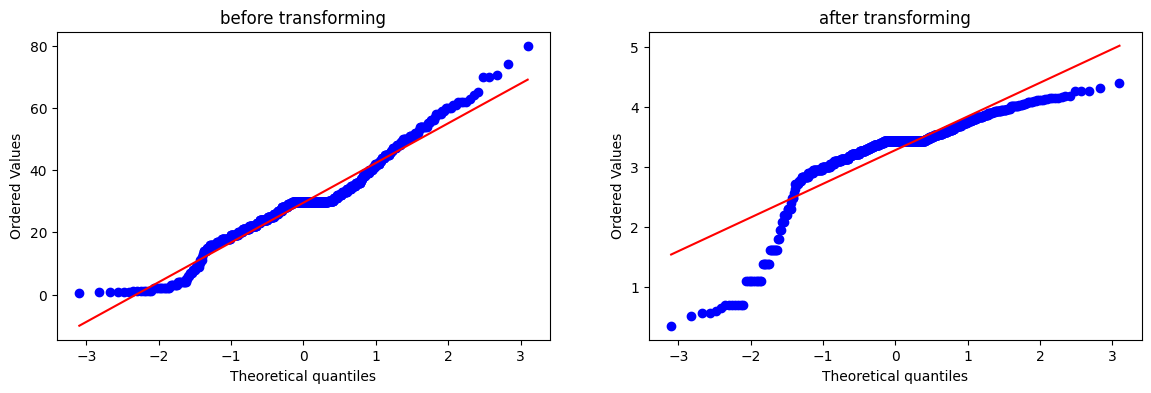

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],plot=plt,dist='norm')
plt.title('before transforming')
plt.subplot(122)
stats.probplot(x_train_trf['Age'],plot=plt,dist='norm')
plt.title('after transforming')

# age is distrubed while apllyind the transformed

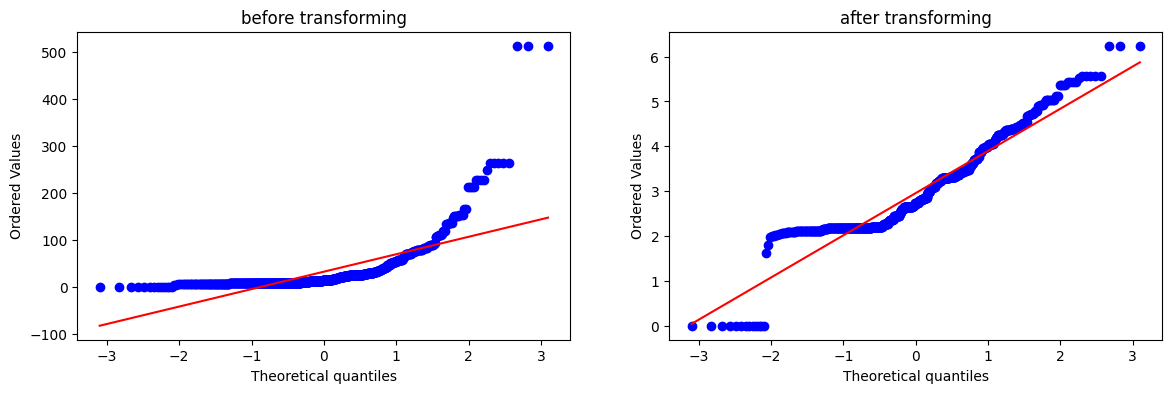

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],plot=plt,dist='norm')
plt.title('before transforming')
plt.subplot(122)
stats.probplot(x_train_trf['Fare'],plot=plt,dist='norm')
plt.title('after transforming')
plt.show()
# fare is nearly closed to normal distrubted

**apply transformed to only fare**

In [42]:
# to only fare
trf2=ColumnTransformer([(
    ('log',FunctionTransformer(np.log1p),['Fare'])
)],remainder='passthrough')
x_train_trf2=trf2.fit_transform(x_train)
x_test_trf2=trf2.transform(x_test)

In [43]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(x_train_trf2,y_train)
clf2.fit(x_train_trf2,y_train)

y_pred=clf.predict(x_test_trf2)
y_pred1=clf2.predict(x_test_trf2)

print("accurancy score of LR",accuracy_score(y_test,y_pred))
print("accurancy score of DR",accuracy_score(y_test,y_pred1))

accurancy score of LR 0.6703910614525139
accurancy score of DR 0.6536312849162011


In [48]:
x_train_trf2

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]])

Text(0.5, 1.0, 'after transforming')

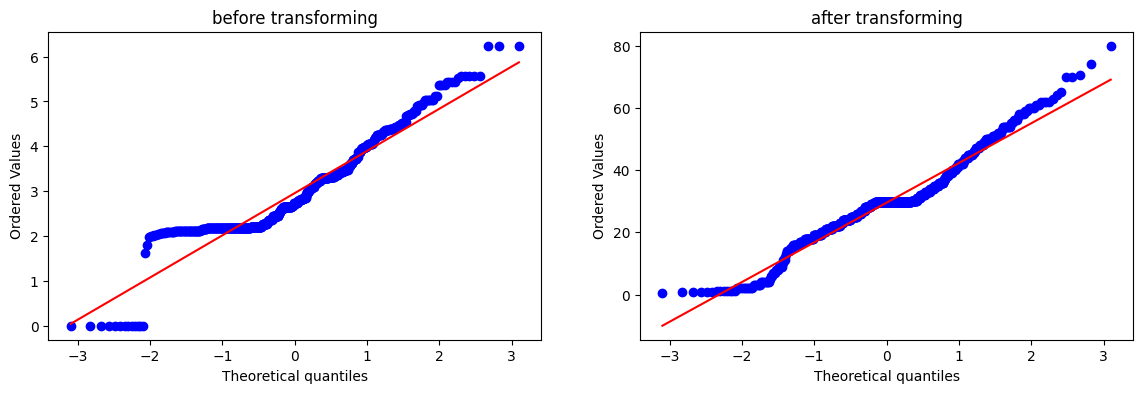

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_trf['Fare'],plot=plt,dist='norm')
plt.title('before transforming')
plt.subplot(122)
# Access the 'Fare' column (which is the first column, index 0) of the NumPy array
stats.probplot(x_train_trf2[:,1],plot=plt,dist='norm')
plt.title('after transforming')

Text(0.5, 1.0, 'after transforming')

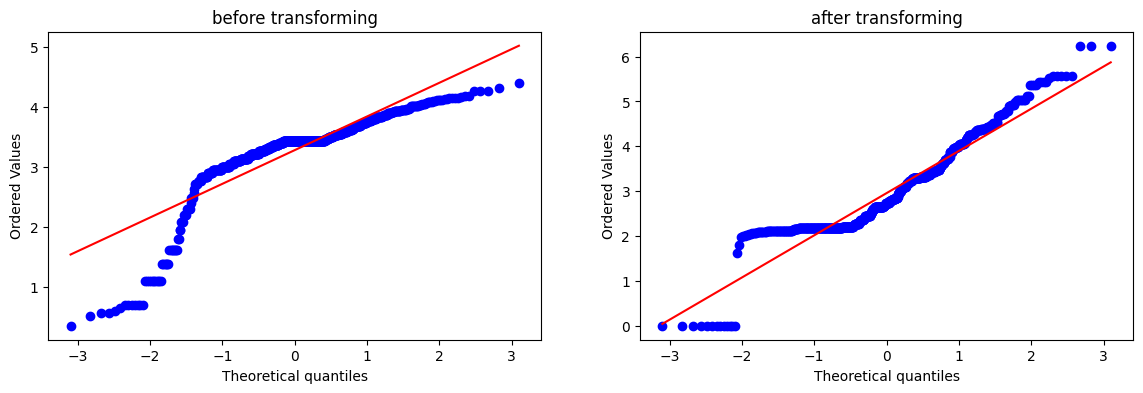

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_trf['Age'],plot=plt,dist='norm')
plt.title('before transforming')
plt.subplot(122)
# Access the 'Fare' column (which is the first column, index 0) of the NumPy array
stats.probplot(x_train_trf2[:,0],plot=plt,dist='norm')
plt.title('after transforming')

In [53]:
x_train_trf

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [55]:
pd.DataFrame(x_train_trf2)

,0,1
0,3.384390,45.500000
1,2.639057,23.000000
2,2.188856,32.000000
3,2.180892,26.000000
4,3.474293,6.000000
...,...,...
707,2.157559,21.000000
708,3.465736,29.699118
709,2.715244,41.000000
710,4.795791,14.000000


In [57]:

def appy_transform(transform):
  x=df.iloc[:,1:3]
  y=df.iloc[:,0]


  trf=ColumnTransformer([(
    ('log',FunctionTransformer(transform),['Fare'])
  )],remainder='passthrough')

  x_trf=trf.fit_transform(x)


  clf=LogisticRegression()

  print("acurrancy",np.mean(cross_val_score(clf,x_trf,y,cv=5,scoring='accuracy')))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(x['Fare'], dist="norm", plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(x_trf[:,0], dist="norm", plot=plt)
  plt.title('Fare After Transform')

  plt.show()


acurrancy 0.6419998744586026


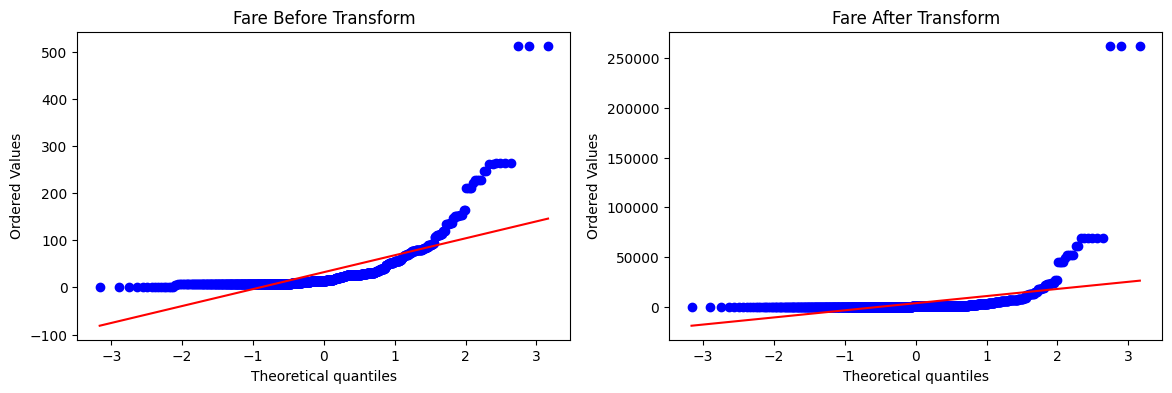

In [58]:
appy_transform(lambda x:x**2)

acurrancy 0.6611574916828824


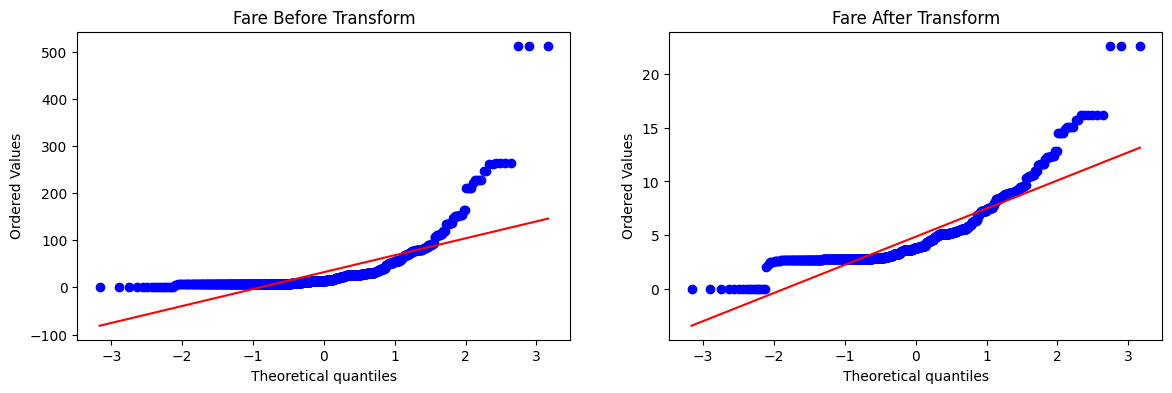

In [59]:
appy_transform(lambda x:np.sqrt(x))

acurrancy 0.6161634548992531


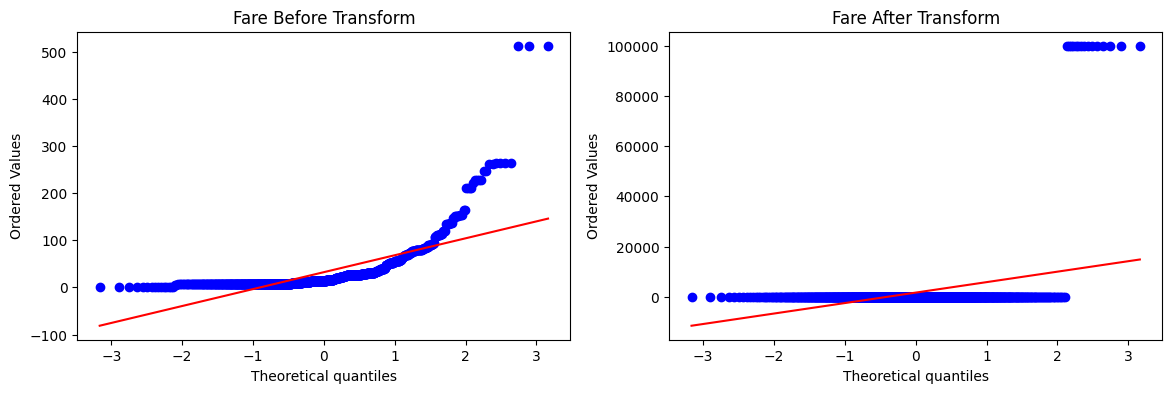

In [63]:
appy_transform(lambda x:1/(x+0.00001))